<b>Astronomy Dataset:</b> <href>https://www.kaggle.com/datasets/melcore/astronomy-picture-of-the-day</href>

<b>Similarity Image Dataset:</b>
<href>https://www.kaggle.com/datasets/tanyadayanand/geological-image-similarity</href>

<b>Noisy Image Dataset:</b>
<href>
https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
</href>


<b>Cat and dog Dataset:</b>
<href>https://www.kaggle.com/datasets/whenamancodes/cat-and-dog-finder</href>




# Kaggle dataset to colab

In [1]:
! pip install kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [3]:
! mkdir ~/.kaggle

If you want to copy the kaggle API credentials to the temporary location... (I recommend placing it on your Google Drive)

In [4]:
#! cp kaggle.json ~/.kaggle/

Upload the json file to Google Drive and then copy to the temporary location.

In [5]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json': No such file or directory


Change the file permissions to read/write to the owner only

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Competitions and Datasets are the two types of Kaggle data**

In [7]:
! mkdir /content/kaggle_data

In [8]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


**1. Download competition data**

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [9]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [00:29<00:00, 79.0MB/s]
100% 2.40G/2.40G [00:29<00:00, 86.4MB/s]


In [10]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

#image_io

In [11]:
from skimage import io

In [12]:
image_1 = io.imread("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png")

In [13]:
image_1

array([[[ 67,  66,  43],
        [ 61,  60,  38],
        [ 54,  53,  31],
        ...,
        [134, 151, 184],
        [131, 149, 182],
        [133, 150, 183]],

       [[ 64,  64,  41],
        [ 62,  61,  39],
        [ 54,  53,  31],
        ...,
        [134, 151, 184],
        [133, 150, 183],
        [134, 151, 184]],

       [[ 59,  61,  38],
        [ 58,  60,  36],
        [ 62,  61,  39],
        ...,
        [134, 151, 184],
        [133, 150, 183],
        [134, 151, 184]],

       ...,

       [[ 17,  17,  15],
        [ 15,  15,  13],
        [ 12,  13,  10],
        ...,
        [ 10,  12,   9],
        [ 10,  12,   9],
        [  8,  11,   8]],

       [[ 17,  17,  15],
        [ 15,  15,  13],
        [ 15,  15,  13],
        ...,
        [  7,  10,   7],
        [  8,  11,   8],
        [  6,   9,   6]],

       [[ 17,  17,  15],
        [ 15,  15,  13],
        [ 15,  15,  13],
        ...,
        [  7,  10,   7],
        [  7,  10,   7],
        [  6,   9,   6]]

# Folder with noisy data

In [14]:
import os

In [15]:
from matplotlib import pyplot as plt
import numpy as np

In [16]:
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene10.png"):
            txt_files.append(os.path.join(root, file))


/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/Bayer Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png


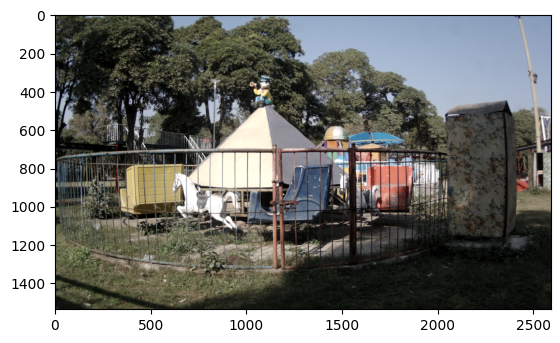

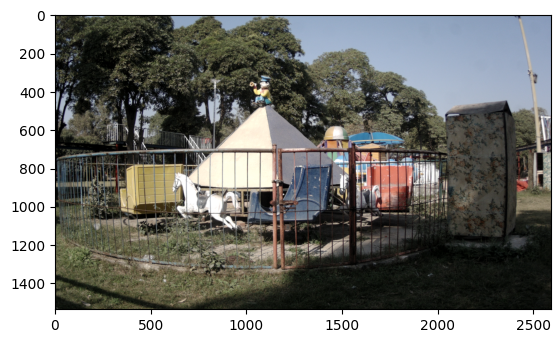

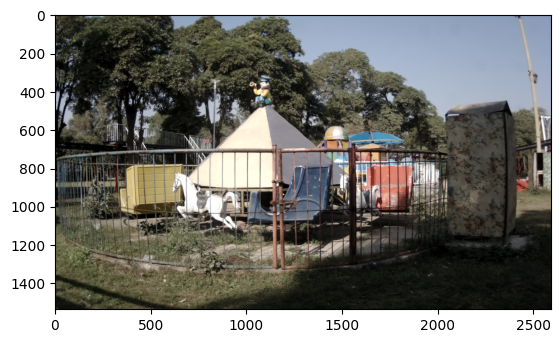

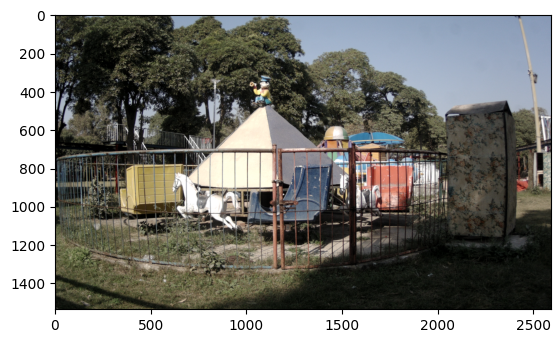

In [17]:
for noisy_image in txt_files:
  print(noisy_image)
  image = io.imread(noisy_image)
  plt.figure()
  plt.imshow(image)

plt.show()

In [18]:
img1 = io.imread(txt_files[0])
img2= io.imread(txt_files[1])
img3= io.imread(txt_files[2])
img4= io.imread(txt_files[3])

Doing addition

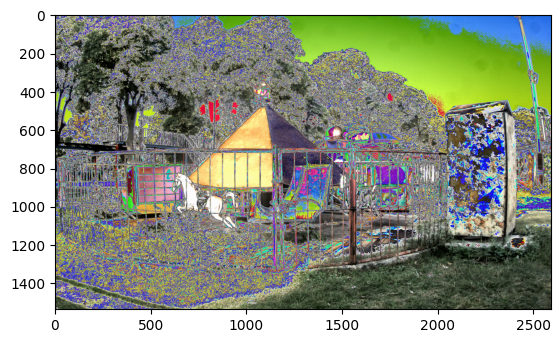

In [19]:
imgsum = img1+img2+img3+img4
imgsum = np.uint8(np.clip(imgsum, 0, 255))
plt.figure()
plt.imshow(imgsum)
plt.show()

Noise reduction by average

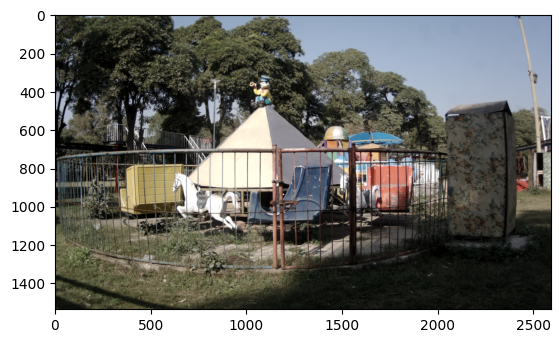

In [20]:
avergimg = np.mean(np.array([img1, img2, img3, img4]), axis=0)
avergimg = np.uint8(np.clip(avergimg, 0, 255))
plt.figure()
plt.imshow(avergimg)
plt.show()

change detection by substraction

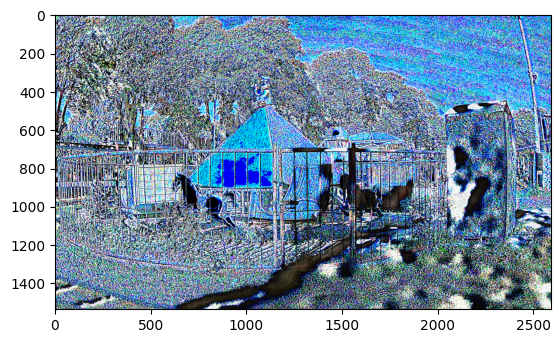

In [21]:
imgsub = img3 - img1
plt.figure()
plt.imshow(imgsub)
plt.show()

masking by multiplication

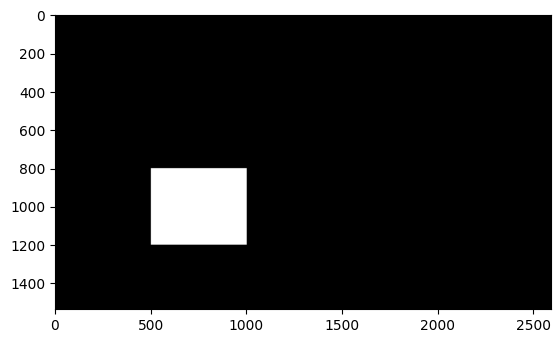

In [22]:
newimg = np.zeros_like(img1)

newimg[800:1200, 500:1000]=255
# Display the new image
plt.figure()
plt.imshow(newimg)
plt.show()
#set pixel to 1
newimg[newimg == 255] =1

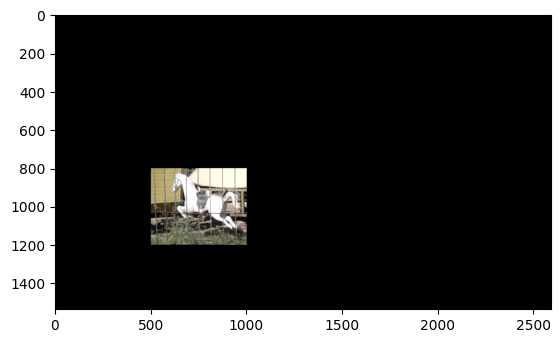

In [23]:
lastimg = img1*newimg
plt.figure()
plt.imshow(lastimg)
plt.show()